#### Read in more concise dataset

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=False)
# please show all columns
pd.set_option("display.max_columns", 60)
import seaborn as sns
sns.set()

In [3]:
# reads in with no explosions
dftts = pd.read_csv('../local/data/LBNL_openpv_tts_data/live_20180118',
                    parse_dates=['install_date'],
                    na_values=[-9999],
                    encoding = 'utf-8',
                    error_bad_lines=False,
                    warn_bad_lines=True) 
dftts.head()

,Unnamed: 0,row_id,file_row,data_provider,sysid_dp,sysid_tts,install_date,size_kw,price,appraised_value,cust_type,new_const,tracking,ground_mounted,battery,zipcode,city,county,state,third-party,uinverter,dc_optimizer,cost_per_watt
0,0,1078236,20378236,Austin Energy,4,TX_AE_6232,1998-01-01,100.0000,NaN,False,GOV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX,0.0,NaN,NaN,NaN
1,1,108220,10108220,California Public Utilities Commission (Curren...,PGE-INT-11328 & CA_ERP_24698,CA-NEM-12257,1998-01-09,2.2824,24500.00,False,RES,0.0,NaN,NaN,NaN,94107.0,San Francisco,San Francisco,CA,NaN,NaN,NaN,10.734315
2,2,107162,10107162,California Public Utilities Commission (Curren...,PGE-INT-11220 & CA_ERP_24687,CA-NEM-11180,1998-01-30,1.8504,20555.54,False,RES,0.0,NaN,NaN,NaN,95949.0,Nevada City,Nevada,CA,NaN,NaN,NaN,11.108701
3,3,969877,20269877,Public Service Company of New Mexico,Qfs<10kW #1,NM-PNM-496,1998-02-01,1.1000,NaN,False,RES,NaN,NaN,NaN,NaN,87505.0,Santa Fe,NaN,NM,NaN,NaN,NaN,NaN
4,4,107618,10107618,California Public Utilities Commission (Curren...,PGE-INT-11268 & CA_ERP_24540,CA-NEM-11641,1998-02-04,2.3076,20000.00,False,RES,0.0,NaN,NaN,NaN,94518.0,Concord,Contra Costa,CA,NaN,NaN,0.0,8.667013


In [4]:
dftts.columns

Index(['Unnamed: 0', 'row_id', 'file_row', 'data_provider', 'sysid_dp',
       'sysid_tts', 'install_date', 'size_kw', 'price', 'appraised_value',
       'cust_type', 'new_const', 'tracking', 'ground_mounted', 'battery',
       'zipcode', 'city', 'county', 'state', 'third-party', 'uinverter',
       'dc_optimizer', 'cost_per_watt'],
      dtype='object')

In [5]:
dftts.index

RangeIndex(start=0, stop=1094909, step=1)

#### validate distributions

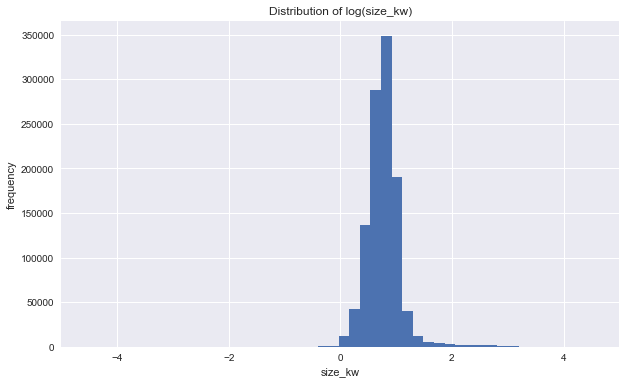

In [6]:
# plot the size `distribution; log cleans it up
np.log10(dftts.size_kw).plot(kind='hist', bins=100)
plt.xlim((-5, +5))
plt.title('Distribution of log(size_kw)')
plt.xlabel('size_kw')
plt.ylabel('frequency');

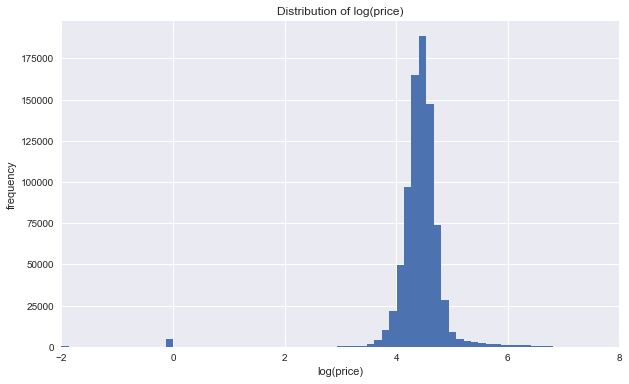

In [7]:
# plot distribution of total cost; log cleans it up
np.log10(dftts.price).plot(kind='hist', bins=100)
plt.xlim((-2, 8))
plt.title('Distribution of log(price)')
plt.xlabel('log(price)')
plt.ylabel('frequency');

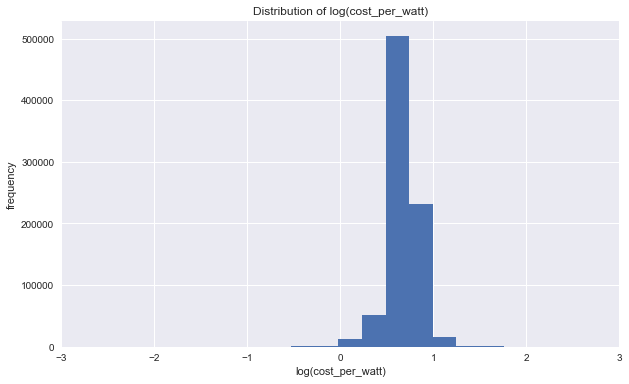

In [8]:
# look at cost/watt. most of the data is reasonable
np.log10(dftts.cost_per_watt).plot(kind='hist', bins=100)
plt.xlim((-3, 3))
plt.title('Distribution of log(cost_per_watt)')
plt.xlabel('log(cost_per_watt)')
plt.ylabel('frequency');

In [9]:
# group by year and month
byYearMonth = dftts.groupby([lambda x: dftts.loc[x, 'install_date'].year,
                              lambda x: dftts.loc[x, 'install_date'].month])

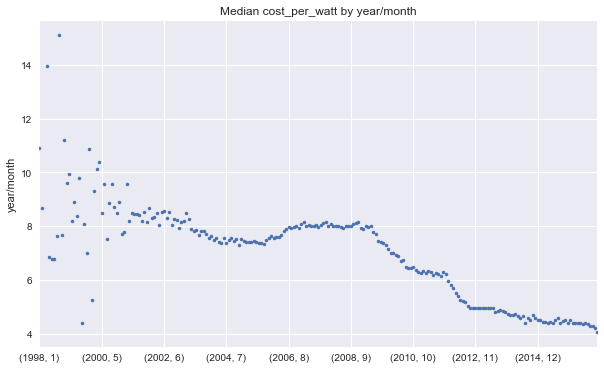

In [10]:
byYearMonth.cost_per_watt.median().plot(linestyle='none', marker='.')
plt.title('Median cost_per_watt by year/month')
plt.ylabel('cost_per_watt')
plt.ylabel('year/month');

In [11]:
install_date_year = dftts.install_date.map(lambda x: x.year)

In [12]:
install_date_year.head()

0    1998
1    1998
2    1998
3    1998
4    1998
Name: install_date, dtype: int64

In [13]:
install_date_month = dftts.install_date.map(lambda x: x.month)

In [14]:
# see ../story/median_cost
# now look at median install price by type/year/month
typeYearMonth = pd.DataFrame(dftts.groupby(['cust_type', 
                                            install_date_year,
                                            install_date_month])['cost_per_watt'].median())
typeYearMonth.head()

cost_per_watt
cust_type install_date install_date               
COM       1998         11                 5.460589
          1999         1                  8.237212
                       4                  8.308584
                       5                  5.187260
                       7                  5.815229

In [15]:
yearMonthbyType = typeYearMonth.unstack('cust_type'); yearMonthbyType.head()

cost_per_watt                                    \
cust_type                           COM GOV NON-PROFIT NON-RES        RES   
install_date install_date                                                   
1998         1                      NaN NaN        NaN     NaN  10.921508   
             2                      NaN NaN        NaN     NaN   8.667013   
             3                      NaN NaN        NaN     NaN        NaN   
             4                      NaN NaN        NaN     NaN  13.962563   
             7                      NaN NaN        NaN     NaN   6.858942   

                                             
cust_type                 SCHOOL TAX-EXEMPT  
install_date install_date                    
1998         1               NaN        NaN  
             2               NaN        NaN  
             3               NaN        NaN  
             4               NaN        NaN  
             7               NaN        NaN

In [16]:
yearMonthbyType.index.values[:3]

array([(1998, 1), (1998, 2), (1998, 3)], dtype=object)

In [17]:
def yearMonthTup_to_datetime(tup):
    ''' Takes a tuple of the form (year(int), month(int)); returns datetime for first of that month'''
    str = '{}{:02d}{}'.format(tup[0], tup[1], '01')
    return pd.to_datetime(str)

In [18]:
theNewIndex = yearMonthbyType.index.map(yearMonthTup_to_datetime)

In [19]:
theNewIndex[:5]

DatetimeIndex(['1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-07-01'],
              dtype='datetime64[ns]', freq=None)

In [20]:
yearMonthbyType.index = theNewIndex; yearMonthbyType.head()

cost_per_watt                                                    
cust_type            COM GOV NON-PROFIT NON-RES        RES SCHOOL TAX-EXEMPT
1998-01-01           NaN NaN        NaN     NaN  10.921508    NaN        NaN
1998-02-01           NaN NaN        NaN     NaN   8.667013    NaN        NaN
1998-03-01           NaN NaN        NaN     NaN        NaN    NaN        NaN
1998-04-01           NaN NaN        NaN     NaN  13.962563    NaN        NaN
1998-07-01           NaN NaN        NaN     NaN   6.858942    NaN        NaN

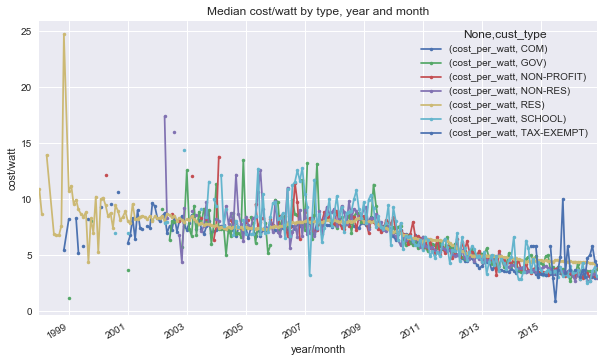

In [21]:
yearMonthbyType.plot(marker='.')
plt.title('Median cost/watt by type, year and month')
plt.xlabel('year/month')
plt.ylabel('cost/watt');

(0, 10)

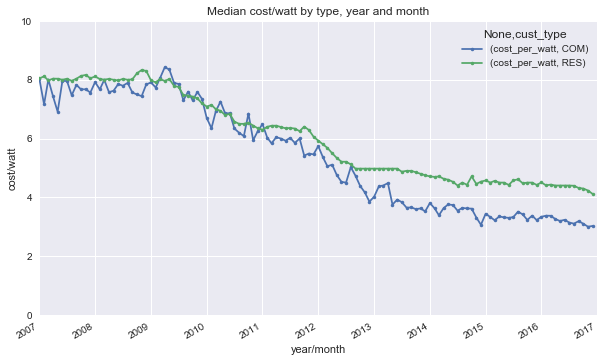

In [22]:
yearMonthbyType.loc[:, (slice(None), ['RES','COM'])].plot(marker='.')
plt.title('Median cost/watt by type, year and month')
plt.xlabel('year/month')
plt.ylabel('cost/watt');
plt.xlim((pd.to_datetime('2007'),pd.to_datetime('2017')))
plt.ylim((0,10))